## **LetsStart**

💪


## **Biginner level task :**

## **Task 3 : Exploratory Data Analysis- Retail**

## **Task Details : all business we can derive by exploring the data.**

## **AUTHOR ✍ : ZINEB BOUGRICHE**

## **Dataset:**
https://bit.ly/3i4rbWl

In [2]:
# Importing packages
import pandas as pd
import numpy as np

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/'

Mounted at /content/drive/


In [4]:
df = pd.read_csv(path + 'SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Which shipping method does the customer choose based on the total product category and quantity?**

In [7]:
# the ship mode
df_shipmode = df[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_shipmode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

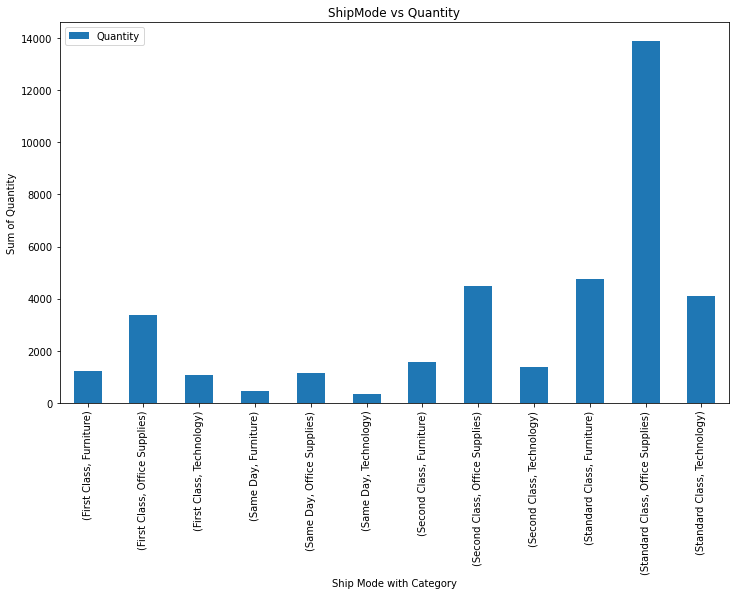

In [8]:
df_shipmode.plot(kind='bar', title='ShipMode vs Quantity', ylabel='Sum of Quantity',
         xlabel='Ship Mode with Category', figsize=(12, 7))

**Conclusion: Most of the customers prefer to choose Standard mode for shipping while compared to other modes.**

**Which shipping method does the customer choose by region?**

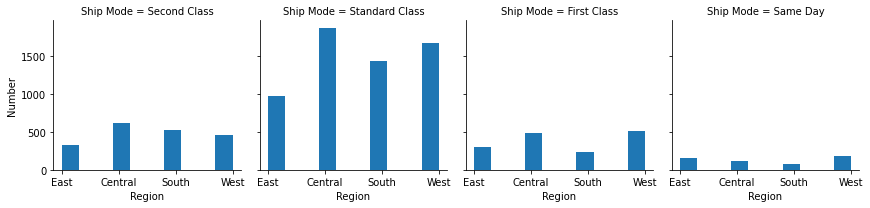

In [9]:
# Let's try to visualize the 'Region' column from the Shipmode column dataset standpoints.

region_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')

**Which state has the largest number of sales?**

In [10]:
#Lets see State vs Maximum Sales

state_sales_df = pd.pivot_table(data=df[['State','Sales']], 
                        index=['State'], 
                        values='Sales',
                        aggfunc='max')

state_sales_df.sort_values(by='Sales', ascending=False).head(10)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


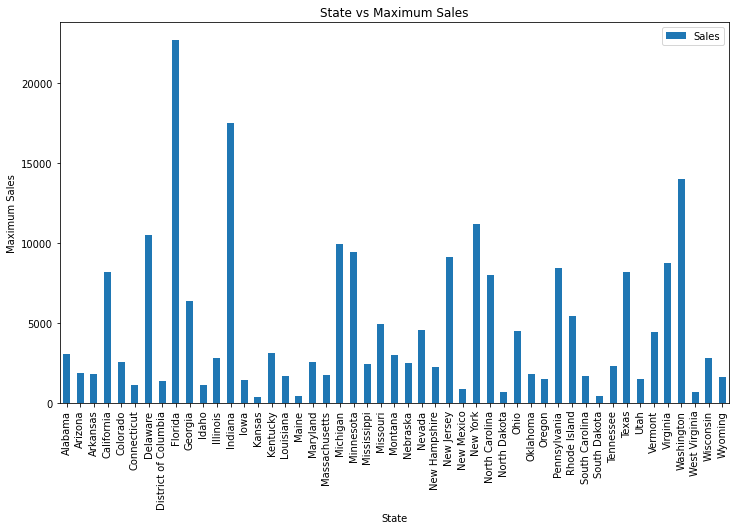

In [11]:
state_sales_df.plot(kind='bar', title='State vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='State', figsize=(12, 7));

**Conclusion: We can see clearly Florida, got maximum sales.**

**Which state do we get the most profit from?**

In [12]:
#Lets see State vs Maximum Profit
state_profit_df = pd.pivot_table(data=df[['State','Profit']], 
                        index=['State'], 
                        values='Profit',
                        aggfunc='max')

state_profit_df.sort_values(by='Profit', ascending=False).head(10)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


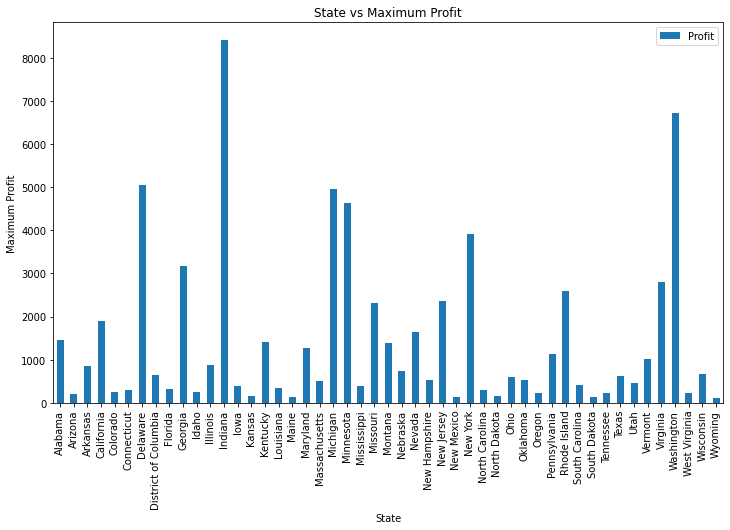

In [13]:
state_profit_df.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='State', figsize=(12, 7))

**Conclusion: From Indiana, we got maximum profit.**

**Which products are selling the most?**

In [14]:
df_Category_sales = pd.pivot_table(data=df[['Category','Sub-Category','Sales']], 
                        index=['Category','Sub-Category'], 
                        values='Sales',
                        aggfunc='max')

df_Category_sales

Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810

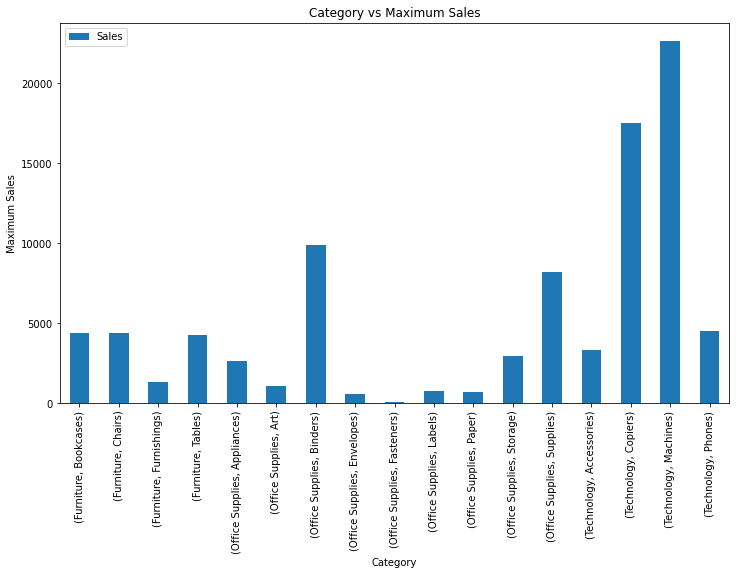

In [15]:
df_Category_sales.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='Category', figsize=(12, 7))

**Conclusion: Machines from the Technology category are selling the most.**

**Which Products are bought in greater amount?**

In [16]:
df_Category_quantity = pd.pivot_table(data=df[['Category','Sub-Category','Quantity']], 
                        index=['Category','Sub-Category'], 
                        values='Quantity',
                        aggfunc='sum')

df_Category_quantity

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

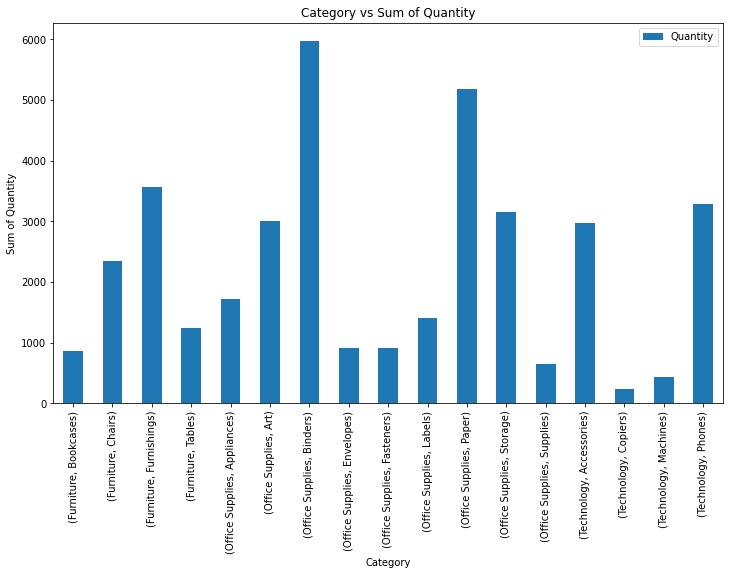

In [17]:
df_Category_quantity.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Category', figsize=(12, 7))

**Conclusion: Binders from the Office Suppliers category are purchased in more quantity.**

**By selling which products we got the minimum profit?**

In [18]:
df_Category_profit = pd.pivot_table(data=df[['Category','Sub-Category','Profit']], 
                        index=['Category','Sub-Category'], 
                        values='Profit',
                        aggfunc='min')

df_Category_profit

Profit
Category        Sub-Category           
Furniture       Bookcases    -1665.0522
                Chairs        -630.8820
                Furnishings   -427.4500
                Tables       -1862.3124
Office Supplies Appliances   -1181.2824
                Art              0.1533
                Binders      -3701.8928
                Envelopes        0.5508
                Fasteners      -11.8256
                Labels           0.6786
                Paper            1.0700
                Storage       -337.8060
                Supplies     -1049.3406
Technology      Accessories    -75.5958
                Copiers         59.9980
                Machines     -6599.9780
                Phones        -386.3916

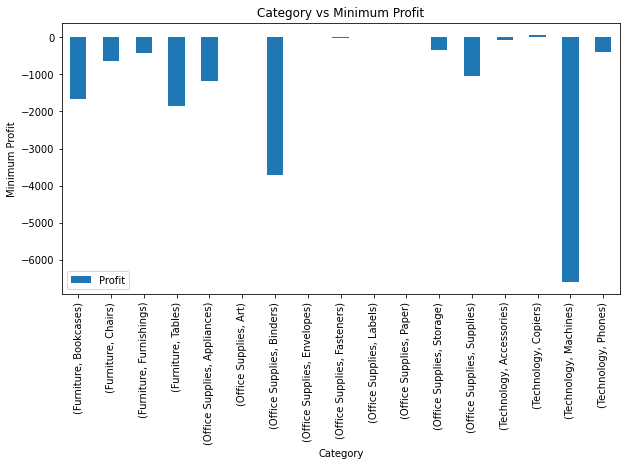

In [19]:
df_Category_profit.plot(kind='bar', title='Category vs Minimum Profit', ylabel='Minimum Profit',
         xlabel='Category', figsize=(10, 5))

**Conclusion: By selling Fasteners from the Office Supplies category we got the minimum profit.**